# AMATH 352B

## Homework Assignment #5 - due 5/13/2022

This Jupyter Notebook consists of several cells.  Some of the cells are **Markdown** cells, and some of the cells are **Code** cells.

Once you have honed your Notebook to the point where you're ready to turn it in, convert the Notebook to HTML and upload both the Notebook (the .ipynb file) and the HTML version of it to Canvas.  There are potentially issues in the conversion involving figures, graphics, and imported files to solve, so leave yourself enough time to get this done.

In [2]:
from math import *
import numpy as np
from scipy.linalg import lu_factor, lu_solve
from scipy.linalg import qr, solve_triangular
import matplotlib as mpl
import matplotlib.pyplot as plt

## Problem #1

What is the Householder reflection that maps the vector $(1,1,1)^T$ to the vector $-(\sqrt{3},0,0)^T$?  Use Python code to compute the answer if you prefer.

In [14]:
x = np.array([1, 1, 1])
v = x - np.array([-sqrt(3), 0, 0])
v2sq = v @ v
q = np.identity(3) - 2 * np.outer(v, v) / v2sq
print(q)

[[-0.57735027 -0.57735027 -0.57735027]
 [-0.57735027  0.78867513 -0.21132487]
 [-0.57735027 -0.21132487  0.78867513]]


## Problem #2

Write Python code to use the bisection method to determine the value of $\ln 2$.  Do this by solving the equation $e^x=2$

In [4]:
def f(x):
    return np.e**x

#inital conditions
x0=0
f0=f(x0)
x1 = 2
f1 = f(x1)
while abs(x0 - x1) > np.finfo(float).eps:
    xnew = 0.5 * (x0 + x1)
    fnew = f(xnew)
    if fnew <= 2:
        x0 = xnew
        f0 = fnew
    else:
        x1 = xnew
        f1 = fnew
print("ln(2) =",xnew)

ln(2) = 0.6931471805599456


## Problem #3

Write Python code to use Newton's method to solve Problem #2

In [5]:
def f(x):
    return np.e**x - 2

def fprime(x):
    return np.e**x

xguess = 0
done = False
while True:
    deltax = -f(xguess) / fprime(xguess)
    xnew = xguess + deltax
    if done:
        break
    if abs(deltax) < sqrt(np.finfo(float).eps):
        done = True
    xguess = xnew
print("ln(2) =", xnew)
xnew = 0

ln(2) = 0.6931471805599454


## Problem #4

By hand, determine the $QR$ factorization of the matrix

$$\begin{pmatrix}2 & 1 & 3\cr 0 & 4 & 5\cr 0 & 0 & 6\cr 0 & 0 & 0\cr\end{pmatrix}$$
$$Q=\begin{pmatrix}1 & 0 & 0\cr 0& 1& 0\cr 0& 0& 1\cr 0 & 0 & 0\cr\end{pmatrix}
  R=\begin{pmatrix}2 & 1 & 3\cr 0 & 4 & 5\cr 0 & 0 & 6\cr\end{pmatrix}$$

## Problem #5

By hand, determine the eigenvalues of the matrix

$$A =\begin{pmatrix}1 & 2 & 3\cr 0 & 4 & 5\cr 0 & 0 & 6\cr\end{pmatrix}$$
$$A-\lambda I=\begin{pmatrix}1 - \lambda & 2 & 3\cr 0 & 4 - \lambda & 5\cr 0 & 0 & 6 - \lambda\cr\end{pmatrix}$$
$$(1-\lambda)(4-\lambda)(6-\lambda)=0$$
$$\lambda=1,4,6$$

## Problem #6

Determine the three eigenvectors corresponding to the three eigenvalues determined in Problem #5

$$
\text{Eigenvectors} =
\begin{pmatrix}1\cr0\cr0\cr\end{pmatrix},
\begin{pmatrix}2\cr3\cr0\cr\end{pmatrix},
\begin{pmatrix}16\cr25\cr10\cr\end{pmatrix}$$

## Problem #7

As an attorney, Mike has been using more paper than he should, and, being very conscientious about the impact of the world's over-reliance on paper, he has started to examine trends in paper production.  In particular, he has observed that the production of graphical paper (i.e. paper used for writing, drawing, and printing) has been steadily declining for many years.  Here is that data for the years 2010-2020:

| Year | Graphic paper produced (in 1000 metric tons) |
| ---- | -------- |
| 2010 | 143335 |
| 2011 | 141079 |
| 2012 | 136607 |
| 2013 | 132865 |
| 2014 | 129394 |
| 2015 | 125637 |
| 2016 | 122645 |
| 2017 | 121102 |
| 2018 | 116426 |
| 2019 | 110234 |
| 2020 | 97208 |

Mike would like to know in which year worldwide production of graphic paper can be expected to fall to 20 million metric tons.  You have offered to help him make this estimate because of your expertise in computational linear algebra and numerical computing.  The following information may help you figure out how to help him:

* The first true paper-making process was invented in China nearly 2000 years ago
* Marcy records UW enrollment on a paper document each quarter
> Your instructor thinks building a cubic model would be appropriate for this data
* Paper has gotten more expensive even as its use has decreased
* Models built from data can be used as input functions for subsequent calculations
* Equations involving continuous rates of change are called **differential equations**
* Hannah is thinking of changing her broadcast frequency to 100 kHz
* Eigenvalues of magnitude less than one can help determine how quickly certain quantities decrease
* Nigel no longer relies on paper charts for navigation

[2024.41347581]
[2024.39890801]
[2024.39888939]
[2024.39888939]
[2024.39888939]
P(20) = [2024.39888939]


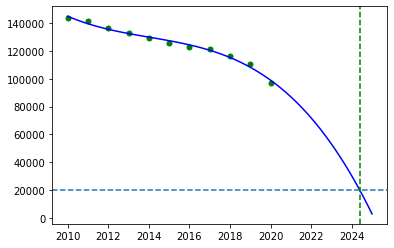

In [6]:
P = np.array([[143335], [141079], [136607], [132865], [129394], [125637], [122645], [121102], [116426], [110234], [97208]])
Y = np.array([[2010], [2011], [2012], [2013], [2014], [2015], [2016], [2017], [2018], [2019], [2020]])

Plength = P.size
tvec = np.array(Y)
vmat = np.zeros((Plength, 4))
for i in range(0, Plength):
    vmat[i, 0] = 1
    vmat[i, 1] = Y[i]
    vmat[i, 2] = Y[i] **2
    vmat[i, 3] = Y[i] **3
    
q, r = qr(vmat, overwrite_a=False, lwork=None, mode='economic', pivoting=False, check_finite=True)
qtb = q.T @ P
avec = solve_triangular(r[:4], qtb[:4])

xvec = np.linspace(2010, 2025, 100)
yvec = avec[0] + xvec * (avec[1] + xvec * (avec[2] + xvec * avec[3]))
plt.plot(Y, P, 'g', marker = 'o', markersize=5, linestyle="")
plt.plot(xvec, yvec, 'b')

def f(x):
    return (avec[3]*(x**3) + avec[2]*(x**2) + avec[1]*x + avec[0]) - 20000
def fprime(x):
    return (3*avec[3]*(x**2) + 2*avec[2]*x + avec[1])

xguess = 2024
done = False
while True:
    deltax = -f(xguess) / fprime(xguess)
    xnew = xguess + deltax
    print(xnew)
    if done:
        break
    if abs(deltax) < sqrt(np.finfo(float).eps):
        done = True
    xguess = xnew
    
print("P(20) =", xnew)
plt.axhline(y=20000,linestyle='--')
plt.axvline(xnew, color = 'g',linestyle='--')